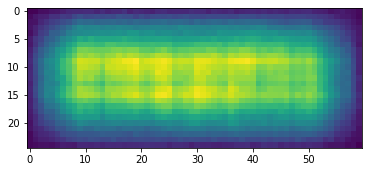

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
with np.load("C:\\Users\\aleks\\Downloads\\data.npz") as data:
    A, C = data['A'], data['C']
plt.imshow(A)

In [12]:
def mat2vec(A):
    h, w = A.shape
    a = np.zeros(h*w, dtype = A.dtype)
    A = np.flipud(A)
    for i, row in enumerate(A):
        a[i*w:i*w+w] = row
    return a

In [13]:
def vec2mat(a, shape):
    h, w = shape
    A = np.zeros(shape, dtype = a.dtype)
    for i in range(h):
        A[i, :] = a[i*w:i*w+w]
    return np.flipud(A)

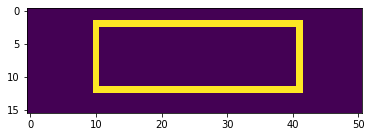

In [29]:
X0 = np.zeros((16, 51))
X0[2:12,10] = 1
X0[2:12,41] = 1
X0[2,10:41] = 1
X0[12,10:42] = 1
plt.imshow(X0)

In [30]:
x0 = mat2vec(X0)
x = C @ x0
X = vec2mat(x, (25,60))

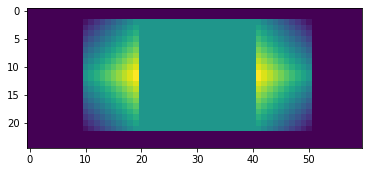

In [31]:
plt.imshow(X)

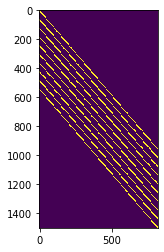

In [28]:
plt.imshow(C)

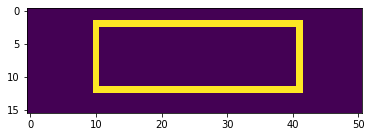

In [32]:
x0_guess = np.linalg.pinv(C) @ x
X0_guess = vec2mat(x0_guess, (16,51))
plt.imshow(X0_guess)

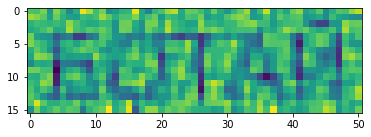

In [368]:
U, s, VT = np.linalg.svd(C)
Sigma = np.zeros((C.shape[0], C.shape[1]))
Sigma[:C.shape[1], :C.shape[1]] = np.diag(s**-1)
SigmaT = np.transpose(Sigma)
VTT = np.transpose(VT)
UT =  np.transpose(U)
C_pinv = VTT @ SigmaT @ UT
n_elements = 350
SigmaT = SigmaT[:n_elements, :]
VTT = VTT[:, :n_elements]
C_cut = VTT @ SigmaT @ UT
a0_guess = C_cut @ a
A0_guess = vec2mat(a0_guess, (16,51))
plt.imshow(A0_guess)